In [1]:
import os
import json
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

In [2]:
chunk_dir = "../../data/chunks"
chunk_files = os.listdir(chunk_dir)

### Visualize chunk length

Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors


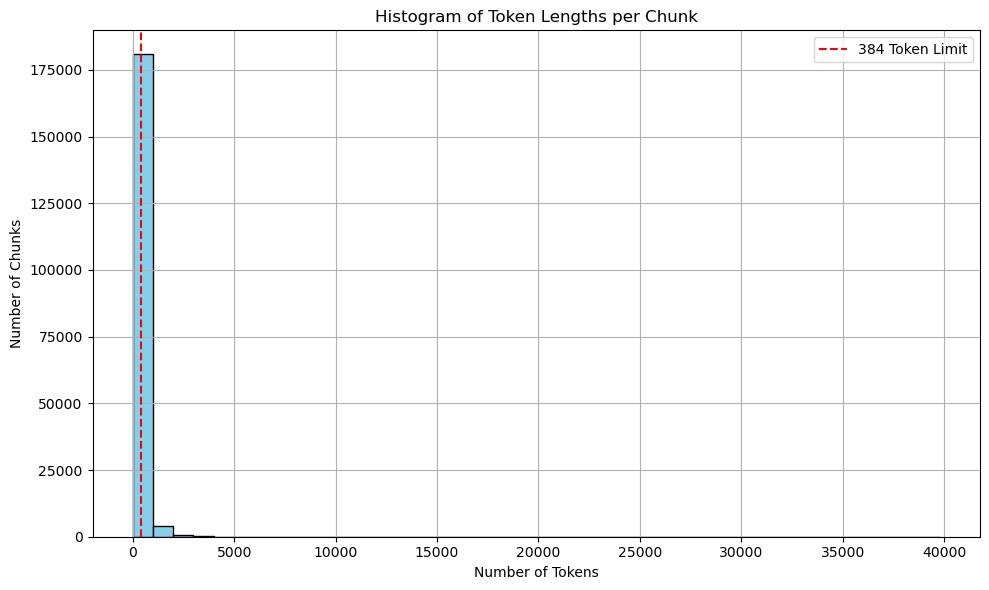

In [4]:
chunk_lengths = []
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")

for filename in chunk_files:
    with open(os.path.join(chunk_dir, filename), 'r', encoding='utf-8') as f:
        chunks = json.load(f)
        for chunk in chunks:
            text = chunk["text"]
            token_count = len(tokenizer.encode(text, truncation=False))
            chunk_lengths.append(token_count)

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(chunk_lengths, bins=40, color='skyblue', edgecolor='black')
plt.title("Histogram of Token Lengths per Chunk")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Chunks")
plt.axvline(384, color='red', linestyle='--', label='384 Token Limit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Only few chunks are greater than 384 token. Token Limit for all all-mpnet-base-v2 is 384. The all-mpnet-base-v2 are designed as a general purpose model and provides the best quality. Hence this model is used for the project.

In [1]:
model = SentenceTransformer('all-mpnet-base-v2')

# Vectorize the chunk and add it to json file
for ind, filename in enumerate(chunk_files):
    if ind % 100 == 0:
        print(f"Processing {ind} chunks")
    chunk_path = os.path.join(chunk_dir, filename)
    with open(chunk_path, 'r', encoding='utf-8') as f:
        chunks = json.load(f)
    embed_list = []
    for chunk in chunks:
        text = chunk["text"]
        chunk['text_vector'] = model.encode(text).tolist()
        embed_list.append(chunk)
    embeddings_path = os.path.join(chunk_dir, f"{filename}.json")
    with open(chunk_path, 'w', encoding='utf-8') as f:
        json.dump(embed_list, f, indent=4)


KeyboardInterrupt

